In [1]:
#important neccessary libraries, can probably get read of two. Come back to!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#read the csv
base_questionnaire = "../clean_personality_dataset.csv"
base_questionnaire_df = pd.read_csv(base_questionnaire)

answer_only = "../answer_only_dataset.csv"
answer_only_df = pd.read_csv(answer_only)

#check
answer_only_df

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,OPN1 : I have a rich vocabulary.,OPN2 : I have difficulty understanding abstract ideas.,OPN3 : I have a vivid imagination.,OPN4 : I am not interested in abstract ideas.,OPN5 : I have excellent ideas.,OPN6 : I do not have a good imagination.,OPN7 : I am quick to understand things.,OPN8 : I use difficult words.,OPN9 : I spend time reflecting on things.,OPN10 : I am full of ideas.
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694881,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,3.0,3.0,5.0,3.0,4.0,2.0,5.0,2.0,3.0,4.0
694882,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,4.0,1.0,4.0,2.0,3.0,2.0,5.0,3.0,4.0,4.0
694883,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
694884,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [3]:
#K-means Finding the right number of clusters through the Elbow Method

In [4]:
#taking a random sample from our data so the computation time isn't too long
sample_elbow = answer_only_df.sample(frac=0.10, replace=True, random_state=1)
sample_elbow

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,OPN1 : I have a rich vocabulary.,OPN2 : I have difficulty understanding abstract ideas.,OPN3 : I have a vivid imagination.,OPN4 : I am not interested in abstract ideas.,OPN5 : I have excellent ideas.,OPN6 : I do not have a good imagination.,OPN7 : I am quick to understand things.,OPN8 : I use difficult words.,OPN9 : I spend time reflecting on things.,OPN10 : I am full of ideas.
128037,3.0,4.0,2.0,4.0,2.0,2.0,1.0,2.0,4.0,5.0,...,5.0,3.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,5.0
491755,3.0,2.0,4.0,5.0,5.0,1.0,5.0,5.0,4.0,2.0,...,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,5.0,5.0
470924,4.0,1.0,4.0,2.0,4.0,1.0,5.0,2.0,4.0,2.0,...,4.0,1.0,5.0,1.0,4.0,1.0,4.0,3.0,5.0,5.0
491263,3.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,2.0,3.0,...,4.0,2.0,1.0,3.0,3.0,5.0,5.0,4.0,5.0,2.0
371403,3.0,1.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,3.0,...,1.0,3.0,4.0,4.0,4.0,2.0,3.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163373,2.0,4.0,3.0,4.0,3.0,3.0,2.0,5.0,2.0,3.0,...,3.0,3.0,4.0,4.0,2.0,2.0,3.0,2.0,5.0,2.0
596365,3.0,4.0,4.0,3.0,5.0,1.0,2.0,5.0,5.0,5.0,...,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0
579037,4.0,1.0,5.0,2.0,5.0,2.0,5.0,4.0,4.0,2.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,5.0,5.0
389140,1.0,3.0,3.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,...,4.0,1.0,4.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0


In [5]:
#decide on what scaling to import from MinMaxScaler or StandardScaler. I chose StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#explain scaler and PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sample_elbow)

In [6]:
#with more than 2 components I wanted to make sure each question/answer was being measured equally and an "effective way to reduce the dimensions of the data"
pca = PCA(n_components=50)
pca_data = pca.fit_transform(data_scaled)

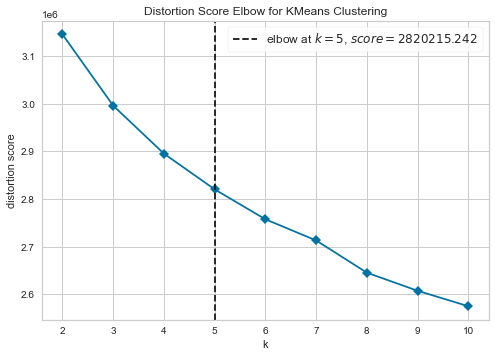

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Visualize the elbow (the elbow will tell us how many clusters are enough for effective analysis and the bend indicates that additional clusters beyond it have less impact value)
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(2,11), timings=False)
#whatever is the () is what's being visulized, trying the whole dataset takes up a lot of time which will be a k of 5, but trying 5000 reccommends 5 clusters, but 50000 reccomends 7 clusters
#doing all the data reccommends 5 clusters but it took a long time, so I reccommend sampling when working with large datasets
visualizer.fit(pca_data)
visualizer.poof()

In [8]:
#K-Means CLustering with 5 clusters

In [9]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA

#incoprate sclare to scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(answer_only_df)

#I want the all 50 questions to be included in the analysis and not the extra portions as not to sway the analysis
pca = PCA(n_components=50)

In [10]:
#PCA requires that the data be centered at 0, but sklearn did this in the previous steps
pca_data = pca.fit_transform(data_scaled)

In [11]:
#I updated sklearn wby adding yellowbrick, so to get rid of warnings we will need to add n_init=10 to keep everything stadanrdized
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(pca_data)

KMeans(n_clusters=5, n_init=10, random_state=42)

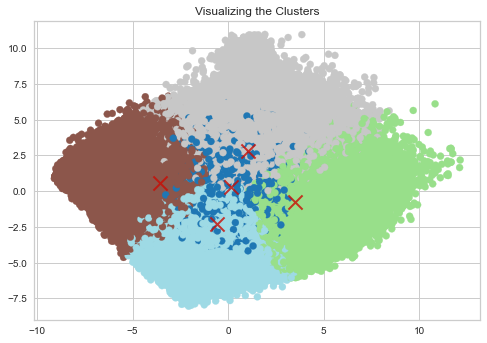

In [12]:
#Use matplotlib to visulize the clutsers
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_, cmap='tab20')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x',alpha=0.8, s=200, linewidths=2, color='r')
plt.title('Visualizing the Clusters')
plt.show()

In [13]:
#create a copy just in case
answer_plus_clusterscore = answer_only_df.copy()

# add cluster number as a new column to the copy
answer_plus_clusterscore["Cluster"] = kmeans.labels_

# print the first 5 rows of the updated copy
answer_plus_clusterscore

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,OPN2 : I have difficulty understanding abstract ideas.,OPN3 : I have a vivid imagination.,OPN4 : I am not interested in abstract ideas.,OPN5 : I have excellent ideas.,OPN6 : I do not have a good imagination.,OPN7 : I am quick to understand things.,OPN8 : I use difficult words.,OPN9 : I spend time reflecting on things.,OPN10 : I am full of ideas.,Cluster
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,4
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694881,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,3.0,5.0,3.0,4.0,2.0,5.0,2.0,3.0,4.0,4
694882,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,1.0,4.0,2.0,3.0,2.0,5.0,3.0,4.0,4.0,4
694883,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,4
694884,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,0


In [24]:
#group each group together
extroversion = answer_plus_clusterscore.iloc[:, 0:10]  
equanimity = answer_plus_clusterscore.iloc[:, 10:20]  
agreeableness = answer_plus_clusterscore.iloc[:, 20:30]
conscientiousness = answer_plus_clusterscore.iloc[:, 30:40]
imaginative = answer_plus_clusterscore.iloc[:, 40:50]

# Calculate the row-wise sum of each group and divide by 10 for the mean
ext = extroversion.sum(axis=1)/10  
equ = equanimity.sum(axis=1)/10 
agr = agreeableness.sum(axis=1)/10
con = conscientiousness.sum(axis=1)/10
img = imaginative.sum(axis=1)/10


# Add the totals as new columns in the DataFrame
answer_plus_clusterscore['Extroversion Mean'] = ext
answer_plus_clusterscore['Equanimity Mean'] = equ
answer_plus_clusterscore['Agreeableness Mean'] = agr
answer_plus_clusterscore['Conscientiousness Mean'] = con
answer_plus_clusterscore['Imaginative Mean'] = img
answer_plus_clusterscore.head(50)

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,OPN7 : I am quick to understand things.,OPN8 : I use difficult words.,OPN9 : I spend time reflecting on things.,OPN10 : I am full of ideas.,Cluster,Extroversion Mean,Equanimity Mean,Agreeableness Mean,Conscientiousness Mean,Imaginative Mean
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,3.0,4.0,5.0,2,3.0,2.4,3.1,3.2,3.3
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4.0,2.0,5.0,3.0,0,3.4,2.1,3.2,3.1,2.7
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,3.0,4.0,4.0,0,2.9,2.6,2.8,2.8,3.1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,4.0,3.0,3.0,4,2.6,2.7,3.2,2.7,3.1
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,4.0,5.0,2.0,2,3.0,2.2,2.8,2.9,3.2
5,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,5.0,5.0,4.0,4.0,4,3.5,3.0,3.3,2.9,3.7
6,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,...,4.0,3.0,4.0,5.0,2,3.0,2.0,3.2,3.3,3.1
7,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,...,5.0,2.0,5.0,5.0,4,2.8,2.8,2.9,2.5,3.3
8,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,...,4.0,3.0,3.0,3.0,3,3.4,3.1,3.3,2.9,2.7
9,3.0,3.0,2.0,3.0,3.0,2.0,4.0,3.0,3.0,5.0,...,5.0,5.0,5.0,5.0,4,3.1,3.5,2.9,3.2,3.8


In [25]:
#create a copy of the original dataframe
base_questionnaire_clusterscore = base_questionnaire_df.copy()

#add cluster number as a new column to the copy of the orginal dataframe
base_questionnaire_clusterscore["Cluster"] = kmeans.labels_ 

base_questionnaire_clusterscore['Extroversion Mean'] = ext  
base_questionnaire_clusterscore['Equanimity Mean'] = equ
base_questionnaire_clusterscore['Agreeableness Mean'] = agr
base_questionnaire_clusterscore['Conscientiousness Mean'] = con
base_questionnaire_clusterscore['Imaginative Mean'] = img

#check the dataframe
base_questionnaire_clusterscore

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,Cluster,Extroversion Mean,Equanimity Mean,Agreeableness Mean,Conscientiousness Mean,Imaginative Mean
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1,Great Britain,51.5448,0.1991,2,3.0,2.4,3.1,3.2,3.3
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1,Malaysia,3.1698,101.706,0,3.4,2.1,3.2,3.1,2.7
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1,Great Britain,54.9119,-1.3833,0,2.9,2.6,2.8,2.8,3.1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1,Great Britain,51.75,-1.25,4,2.6,2.7,3.2,2.7,3.1
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,1,Sweden,59.3333,18.05,2,3.0,2.2,2.8,2.9,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694881,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,1,Great Britain,52.4189,-1.5054,4,2.8,2.8,3.6,3.2,3.4
694882,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,1,Turkey,41.0186,28.9647,4,2.9,4.2,3.5,3.3,3.2
694883,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1,United States,38.0,-97.0,4,3.4,4.0,3.3,2.8,3.3
694884,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,1,United States,34.1067,-117.8067,0,2.8,3.3,3.1,3.0,3.5


In [26]:
#Just in case I want to dive in each cluster seperately with in juptyer notebooks 
cluster_0 = answer_plus_clusterscore[kmeans.labels_ == 0].copy()
cluster_1 = answer_plus_clusterscore[kmeans.labels_ == 1].copy()
cluster_2 = answer_plus_clusterscore[kmeans.labels_ == 2].copy()
cluster_3 = answer_plus_clusterscore[kmeans.labels_ == 3].copy()
cluster_4 = answer_plus_clusterscore[kmeans.labels_ == 4].copy()

#check if the combined rows of each cluster datafram match the amount of rows in the answer_plus_clusterscore dataframe.
len(cluster_0)+ len(cluster_1)+len(cluster_2)+ len(cluster_3)+ len(cluster_4)

694886

In [27]:
#saving just a sample, to work with, so we can see the excel shet on github
answers_only_sample = answer_plus_clusterscore.sample(frac=0.10, replace=True, random_state=1)
whole_questionnaire_sample = base_questionnaire_clusterscore.sample(frac=0.10, replace=True, random_state=1)

In [28]:
#save and write data
answers_only_sample.to_csv("../answers_only_sample.csv", encoding="utf-8", index=False)
whole_questionnaire_sample.to_csv("../whole_questionnaire_sample.csv", encoding="utf-8", index=False)

In [29]:
############Next practice in Excel!!!